<a href="https://colab.research.google.com/github/Fecarvalho00/Analise_de_fraude_em_cartao_de_credito/blob/main/Fraud_autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Projetos DS/Fraude/AutoEncoder Fraud/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().values.any()

False

In [ ]:
#Excluindo colunas não utilizadas
df = df.drop(['Time', 'Amount'], axis =1)


In [ ]:
fraude = df[df.Class==1]
clean = df[df.Class == 0]

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [ ]:
import umap
import seaborn as sns


In [28]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [37]:
reducer = umap.UMAP(n_components = 2)
embedding = reducer.fit_transform(X)


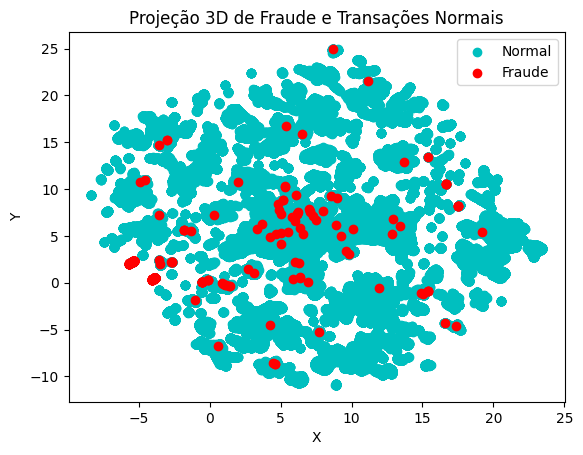

In [43]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')

fraude_indices = (y==1)
normal_indices = (y==0)

plt.scatter(embedding[normal_indices, 0], embedding[normal_indices, 1], c='c', label='Normal')
plt.scatter(embedding[fraude_indices, 0], embedding[fraude_indices, 1], c='r', label='Fraude')
#ax.view_init(elev=20, azim=30)


plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.title('Projeção 3D de Fraude e Transações Normais')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)